<a href="https://colab.research.google.com/github/CunhaCarol/MVP2/blob/main/MVP_Machine_Learning_%26_Analytics_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Nome:** Carolina de Noronha Figueiredo Vieira da Cunha

**Matrícula:** 4052025000199

**Dataset:** [Default of Credit Card Clients](https://raw.githubusercontent.com/CunhaCarol/DATASET2/refs/heads/main/default%20of%20credit%20card%20clients.csv)

https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls



# Descrição do Problema

Este projeto utiliza o conjunto de dados Default of Credit Card Clients, que contém informações financeiras e demográficas de 30.000 clientes de cartão de crédito.


O objetivo é prever se um cliente será inadimplente no próximo mês, com base em atributos como limite de crédito, histórico de pagamento, faturas e pagamentos mensais.

## Hipóteses do Problema

1 - Existe correlação entre o histórico de pagamento e a inadimplência?

2 - Quais variáveis mais influenciam na classificação de um cliente como inadimplente?

3 - Qual modelo entrega o melhor equilíbrio entre identificar inadimplentes e evitar erros de classificação?


## Tipo de Problema

Este é um problema de classificação binária supervisionada.

A variável alvo é default, onde:

1 indica inadimplência
0 indica adimplência

## Seleção de Dados e Atributos do Dataset

O dataset contém 30.000 registros e 23 variáveis, incluindo:

LIMIT_BAL: Limite de crédito

SEX, EDUCATION, MARRIAGE, AGE: Atributos demográficos

PAY_0 a PAY_6: Histórico de pagamento

BILL_AMT1 a BILL_AMT6: Faturas mensais

PAY_AMT1 a PAY_AMT6: Pagamentos mensais

default: Variável alvo (inadimplência)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção inclui bibliotecas para manipulação de dados e carga do DATASET

In [1]:
# Manipulação de dados
import pandas as pd

# Pré-processamento e seleção de variáveis
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Avaliação de desempenho
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, fbeta_score, make_scorer)

# Visualização de resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceamento de classes
from imblearn.over_sampling import SMOTE


In [2]:
# Baixar e carregar o dataset diretamente do repositório da UCI

url = "https://raw.githubusercontent.com/CunhaCarol/DATASET2/refs/heads/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(url, sep=';', header=1)


# Dados: Verificação, entendimento e insights

In [3]:
# Verificação dos dados

print("- Formato:", df.shape)
print("- Tipos de dados:\n", df.dtypes)

# Valores ausentes:
print("- Valores ausentes:\n", df.isnull().sum())
print("- Duplicatas:", df.duplicated().sum())

# Remoção de duplicatas se necessário
df.drop_duplicates(inplace=True)



- Formato: (30000, 25)
- Tipos de dados:
 ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object
- Valores ausentes:
 ID                     

In [4]:
# Dicionário
print("\nDicionário de variáveis (principais):")
print("- ID: Identificador do cliente")
print("- LIMIT_BAL: Limite de crédito")
print("- SEX: Gênero (1 = masculino, 2 = feminino)")
print("- EDUCATION: Nível educacional")
print("- MARRIAGE: Estado civil")
print("- AGE: Idade")
print("- PAY_0 a PAY_6: Histórico de pagamento nos últimos meses")
print("- BILL_AMT1 a BILL_AMT6: Valor da fatura nos últimos meses")
print("- PAY_AMT1 a PAY_AMT6: Valor do pagamento nos últimos meses")
print("- default: Variável alvo (1 = inadimplente, 0 = adimplente)")




Dicionário de variáveis (principais):
- ID: Identificador do cliente
- LIMIT_BAL: Limite de crédito
- SEX: Gênero (1 = masculino, 2 = feminino)
- EDUCATION: Nível educacional
- MARRIAGE: Estado civil
- AGE: Idade
- PAY_0 a PAY_6: Histórico de pagamento nos últimos meses
- BILL_AMT1 a BILL_AMT6: Valor da fatura nos últimos meses
- PAY_AMT1 a PAY_AMT6: Valor do pagamento nos últimos meses
- default: Variável alvo (1 = inadimplente, 0 = adimplente)


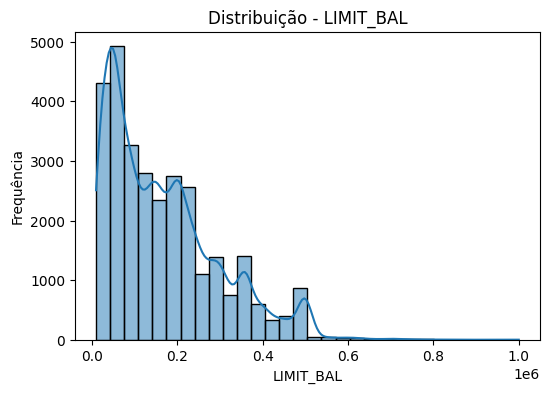

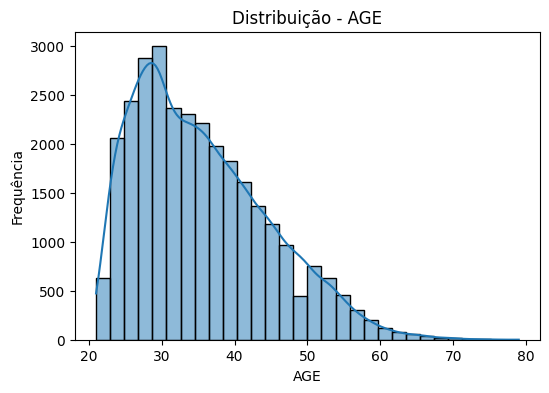

In [5]:
for col in ['LIMIT_BAL', 'AGE']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribuição - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

A maioria dos clientes tem limites de crédito mais baixos, concentrados nas faixas iniciais. Há uma cauda longa à direita, indicando que poucos clientes têm limites muito altos.


A maior concentração de clientes está entre 25 e 35 anos, com o pico em torno dos 30 anos. A frequência diminui gradualmente conforme a idade aumenta, indicando que há menos clientes mais velhos no dataset.




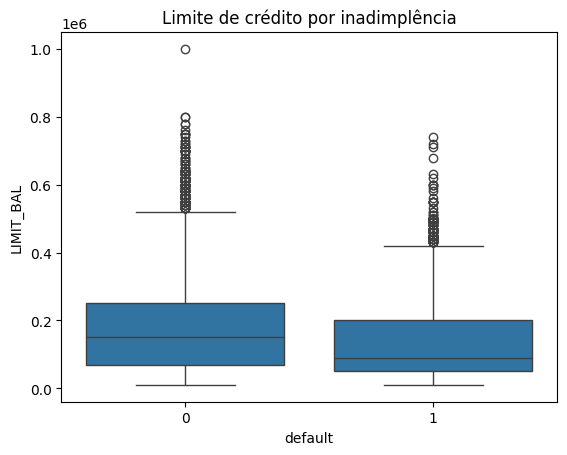

In [6]:
# Renomear a coluna alvo
df.rename(columns={'default payment next month': 'default'}, inplace=True)

sns.boxplot(x='default', y='LIMIT_BAL', data=df)
plt.title('Limite de crédito por inadimplência')
plt.show()


Clientes inadimplentes (1) tendem a ter limites de crédito ligeiramente menores do que os adimplentes (0), embora a diferença não seja muito acentuada.

Há outliers em ambos os grupos, com alguns clientes tendo limites de crédito extremamente altos (acima de 500.000).

O gráfico sugere que limites mais altos não necessariamente significam maior inadimplência.

SEX_LABEL
Feminino     18112
Masculino    11888
Name: count, dtype: int64


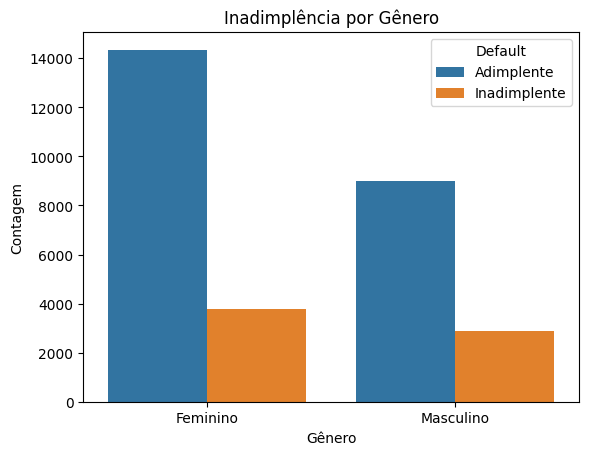

SEX_LABEL
Feminino     0.207763
Masculino    0.241672
Name: default, dtype: float64


In [7]:
# Mapear os valores de gênero para rótulos legíveis
df['SEX_LABEL'] = df['SEX'].map({1: 'Masculino', 2: 'Feminino'})

# Contar a quantidade de clientes por gênero
print(df['SEX_LABEL'].value_counts())

# Visualizar inadimplência por gênero
sns.countplot(x='SEX_LABEL', hue='default', data=df)
plt.title('Inadimplência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Default', labels=['Adimplente', 'Inadimplente'])
plt.show()

# Taxa média de inadimplência por gênero
print(df.groupby('SEX_LABEL')['default'].mean())

Embora o número absoluto de mulheres no dataset seja maior, os homens apresentam uma taxa de inadimplência proporcionalmente mais alta.

Cerca de 24,17% dos homens são inadimplentes, contra 20,78% das mulheres.
Isso indica que, em média, o risco de inadimplência é maior entre os clientes do sexo masculino

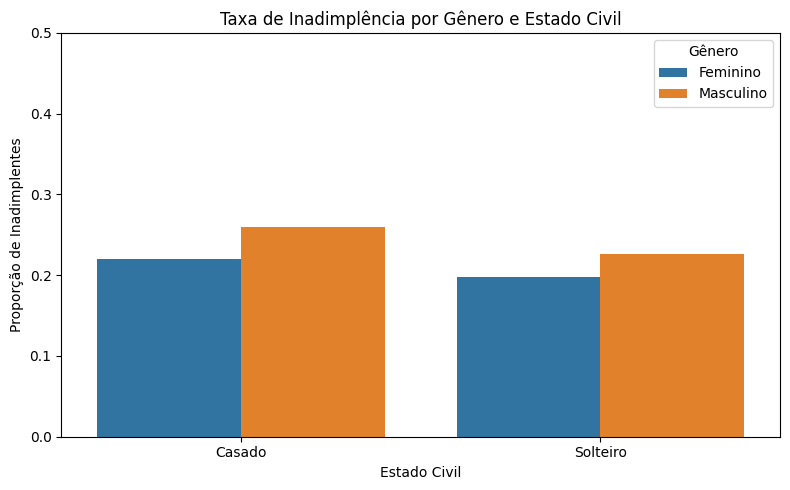

In [8]:
# Filtrar apenas solteiros e casados e criar cópia segura
df_filtered = df[df['MARRIAGE'].isin([1, 2])].copy()

# Mapear estado civil para rótulos legíveis
df_filtered['MARRIAGE_LABEL'] = df_filtered['MARRIAGE'].map({1: 'Casado', 2: 'Solteiro'})

# Agrupar e calcular taxa de inadimplência
grouped = df_filtered.groupby(['SEX_LABEL', 'MARRIAGE_LABEL'])['default'].mean().reset_index()

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='MARRIAGE_LABEL', y='default', hue='SEX_LABEL')
plt.title('Taxa de Inadimplência por Gênero e Estado Civil')
plt.ylabel('Proporção de Inadimplentes')
plt.xlabel('Estado Civil')
plt.ylim(0, 0.5)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

Mulheres casadas têm uma taxa de inadimplência em torno de 20%.
Homens casados têm uma taxa mais alta, próxima de 30%.

Mulheres solteiras também têm inadimplência em torno de 20%.
Homens solteiros têm inadimplência ligeiramente maior, cerca de 25%.

Homens, tanto casados quanto solteiros, apresentam maior risco de inadimplência em comparação com mulheres.

O estado civil não altera drasticamente a inadimplência entre mulheres, mas entre homens, casar parece estar associado a maior inadimplência.

Heat Map

In [9]:
print(df.columns.tolist())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_LABEL']


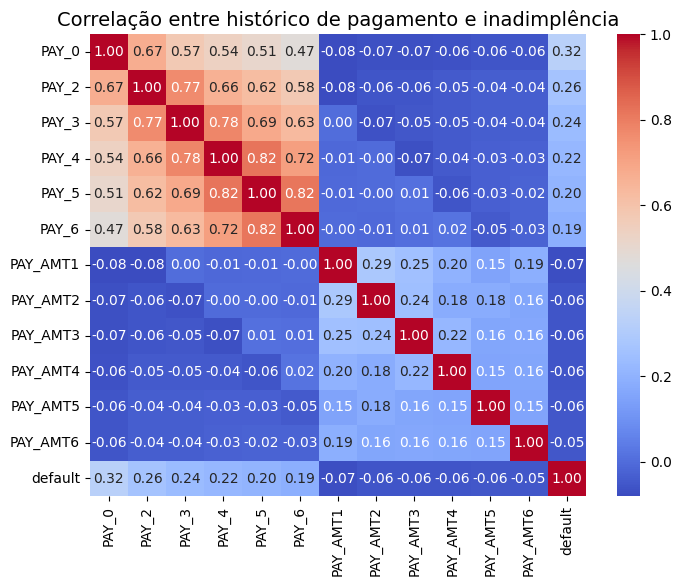

In [10]:
# Coluna alvo
target_col = "default"

# Colunas de histórico de pagamento
pay_cols = [col for col in df.columns if col.startswith("PAY_")]

# Calcular correlação entre variáveis de pagamento e inadimplência
corr_matrix = df[pay_cols + [target_col]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlação entre histórico de pagamento e inadimplência", fontsize=14)
plt.show()


Em resposta à questão 1, verificamos que existe correlação entre o histórico de pagamento e a inadimplência.

As variáveis PAY_0, PAY_2 e PAY_3 apresentam as correlações mais fortes e positivas com a inadimplência (default), variando de 0.24 a 0.32.

Isso indica que atrasos mais recentes (especialmente em PAY_0, que corresponde ao mês mais próximo) estão mais associados à probabilidade de inadimplência futura.

Já os pagamentos feitos (PAY_AMT1 a PAY_AMT6) têm correlação negativa fraca com a inadimplência, o que sugere que pagar mais reduz o risco, mas o efeito é pequeno.

Em resumo: o histórico de atraso no pagamento é um preditor relevante de inadimplência, confirmando a intuição de que clientes que atrasaram recentemente têm maior risco de não pagar no próximo mês

# Preparação dos dados

Separação entre features e target

In [11]:

X = df.drop(columns=['ID', 'default', 'SEX_LABEL'])  # Remoção de colunas irrelevantes
y = df['default']  # Definição da variável alvo


Divisão dos dados

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Pipeline de tratamento

In [13]:
# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Seleção de atributos
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Visualização dos atributos selecionados
selected_features = X.columns[selector.get_support()]
print("\nTop 10 features selecionadas:")
print(selected_features)



Top 10 features selecionadas:
Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT6'],
      dtype='object')


# Modelagem e treinamento

In [14]:
# Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_selected, y_train)
log_preds = log_model.predict(X_test_selected)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)
rf_preds = rf_model.predict(X_test_selected)


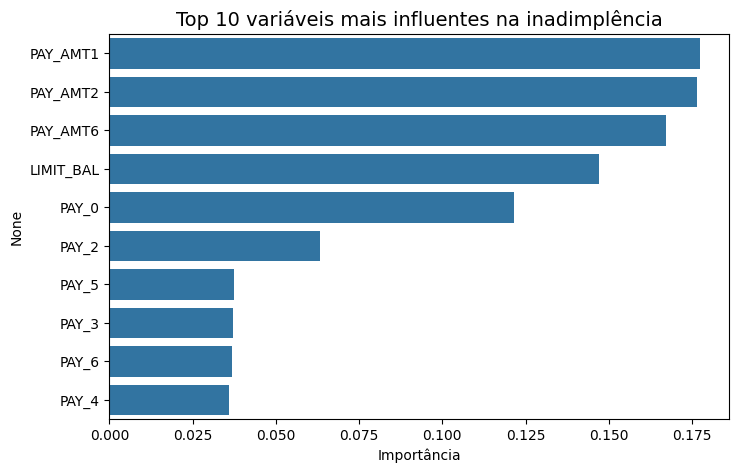


Top 10 variáveis mais influentes:
PAY_AMT1     0.177340
PAY_AMT2     0.176502
PAY_AMT6     0.167268
LIMIT_BAL    0.146959
PAY_0        0.121610
PAY_2        0.063116
PAY_5        0.037273
PAY_3        0.037180
PAY_6        0.036823
PAY_4        0.035928
dtype: float64


In [15]:
# Importância das variáveis
importances = rf_model.feature_importances_

# Usar os nomes das features selecionadas
features = selected_features

# Ordenar importâncias
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Mostrar top 10 em gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10])
plt.title("Top 10 variáveis mais influentes na inadimplência", fontsize=14)
plt.xlabel("Importância")
plt.show()

# Mostrar valores no console
print("\nTop 10 variáveis mais influentes:")
print(feat_importances[:10])


Em resposta à questão 2, o modelo sugere que o comportamento financeiro recente (valores pagos nos últimos meses) é a maior fonte de informação para prever inadimplência.

O limite de crédito também contribui, mas em menor grau. O histórico de atraso auxilia, mas tem peso menor que os pagamentos efetivos.

# Ajuste de Hiperparâmetros

In [25]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_preds = best_rf_model.predict(X_test_selected)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros encontrados: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}


Nesta etapa, otimizamos o modelo de Random Forest testando diferentes combinações de hiperparâmetros com Grid Search e validação cruzada. Selecionamos o melhor modelo (best_rf_model) e usamos ele para gerar previsões mais precisas no conjunto de teste (best_rf_preds).

O computador testou várias versões do modelo de floresta de decisão para ver qual funcionava melhor. Ele descobriu que a configuração mais eficaz foi usar 50 árvores, cada uma com até 10 níveis de decisão, e permitindo divisões simples nos dados.

Em outras palavras: esse é o “jeito” que o modelo aprendeu a identificar quem tem mais chance de dar calote, equilibrando bem a detecção de inadimplentes sem exagerar nos falsos alarmes.

# Avaliação de Modelos

In [26]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} - Avaliação:")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_true, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_true, y_pred))

evaluate_model("Regressão Logística", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Random Forest (Ajustado)", y_test, best_rf_preds)


Regressão Logística - Avaliação:
Acurácia: 0.8098333333333333
Matriz de Confusão:
 [[4566  121]
 [1020  293]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.71      0.22      0.34      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000


Random Forest - Avaliação:
Acurácia: 0.808
Matriz de Confusão:
 [[4375  312]
 [ 840  473]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.60      0.36      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Random Forest (Ajustado) - Avaliação:
Acurácia: 0.8208333333333333
Matriz de Confusã

# Comparação entre os modelos

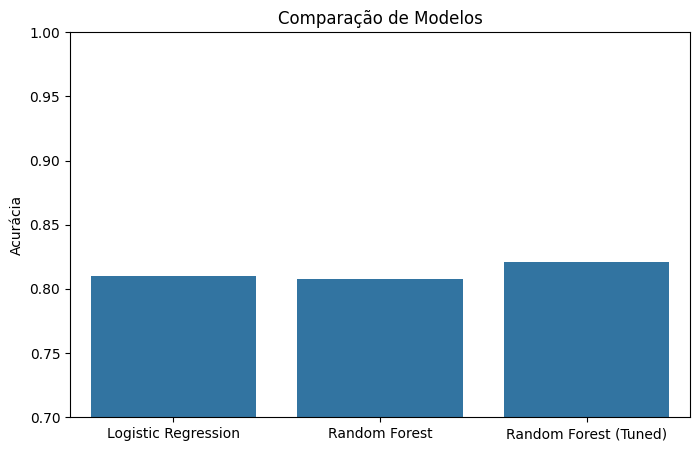

In [27]:
models = ['Logistic Regression', 'Random Forest', 'Random Forest (Tuned)']
accuracies = [
    accuracy_score(y_test, log_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, best_rf_preds)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylabel('Acurácia')
plt.title('Comparação de Modelos')
plt.ylim(0.7, 1.0)
plt.show()

O Random Forest ajustado realiza o processo chamado ajuste de hiperparâmetros, testando várias configurações internas do modelo para encontrar a combinação que dá os melhores resultados. Para isso, olha-se três números principais:


Precision: Quando o modelo diz “essa pessoa vai dar calote”, quantas vezes ele acerta?

Recall: De todas as pessoas que realmente deram calote, quantas ele conseguiu encontrar?

F1-Score: Um equilíbrio entre os dois acima. O F1-Score é útil quando se quer evitar dois erros ao mesmo tempo:

Acusar alguém de ser inadimplente quando não é.
Deixar passar alguém que realmente vai ser inadimplente.

O Random Forest Ajustado foi o melhor porque:

  Tem maior F1-Score para inadimplentes (0.47);

  Tem recall mais alto que a regressão logística (36% vs 22%), ou seja, identifica mais inadimplentes reais;

  Tem boa precisão (67%), ou seja, quando ele diz que alguém vai dar calote, ele acerta em 67% dos casos.

  Os resultados mostram que o Random Forest ajustado teve o melhor desempenho geral, com acurácia de 82%, superando ligeiramente a Regressão Logística (81%) e o Random Forest padrão (81%). Ele também apresenta melhor equilíbrio entre precisão e recall para a classe de inadimplentes, indicando previsões mais confiáveis para clientes com risco de inadimplência.
  
  Entretanto observa-se que os modelos apresentam recall e F1-score mais baixos para a classe inadimplentes, o que indica que pode haver pouca representatividade dela nos dados.  



In [28]:
# Contar quantos exemplos há de cada classe
pd.Series(y_train).value_counts()

,count
default,
0,18677
1,5323


Nesta etapa aplicamos SMOTE para balancear a classe de inadimplentes no conjunto de treinamento. Em seguida, treinamos novamente os modelos para melhorar sua capacidade de identificar clientes que realmente têm risco de inadimplência, aumentando recall e F1-score da classe minoritária.

In [29]:
# Reaplicar seleção de features para garantir consistência
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Treinar novamente os modelos com dados balanceados
# 1) Regressão Logística
log_model_smote = LogisticRegression(max_iter=1000)
log_model_smote.fit(X_train_balanced, y_train_balanced)
log_preds_smote = log_model_smote.predict(X_test_selected)

# 2) Random Forest padrão
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_balanced, y_train_balanced)
rf_preds_smote = rf_model_smote.predict(X_test_selected)

# 3) Random Forest ajustado (melhores hiperparâmetros do Grid Search)
rf_model_smote_adjusted = RandomForestClassifier(
    n_estimators=best_rf_model.n_estimators,
    max_depth=best_rf_model.max_depth,
    min_samples_split=best_rf_model.min_samples_split,
    random_state=42
)
rf_model_smote_adjusted.fit(X_train_balanced, y_train_balanced)
rf_preds_smote_adjusted = rf_model_smote_adjusted.predict(X_test_selected)

# Avaliar os modelos com SMOTE
evaluate_model("Regressão Logística (SMOTE)", y_test, log_preds_smote)
evaluate_model("Random Forest (SMOTE)", y_test, rf_preds_smote)
evaluate_model("Random Forest Ajustado (SMOTE)", y_test, rf_preds_smote_adjusted)



Regressão Logística (SMOTE) - Avaliação:
Acurácia: 0.6718333333333333
Matriz de Confusão:
 [[3139 1548]
 [ 421  892]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76      4687
           1       0.37      0.68      0.48      1313

    accuracy                           0.67      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.77      0.67      0.70      6000


Random Forest (SMOTE) - Avaliação:
Acurácia: 0.7701666666666667
Matriz de Confusão:
 [[3966  721]
 [ 658  655]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4687
           1       0.48      0.50      0.49      1313

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000


Random Forest Ajustado (SMOTE) - Avaliação:
Acurácia: 0

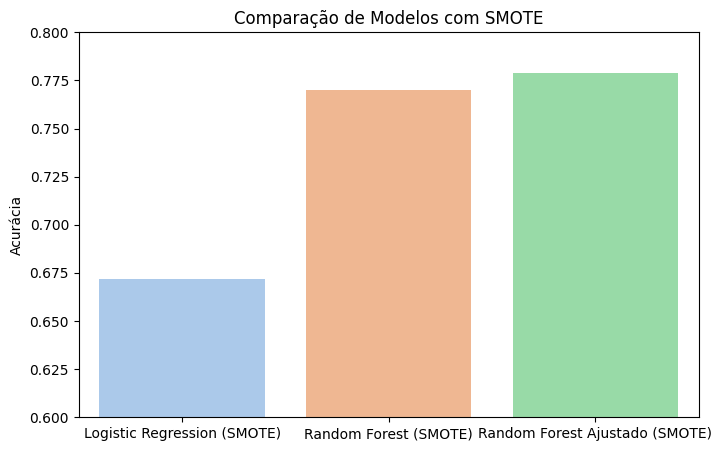

In [21]:
models = ['Logistic Regression (SMOTE)', 'Random Forest (SMOTE)', 'Random Forest Ajustado (SMOTE)']
accuracies = [
    accuracy_score(y_test, log_preds_smote),
    accuracy_score(y_test, rf_preds_smote),
    accuracy_score(y_test, rf_preds_smote_adjusted)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, hue=models, palette='pastel', dodge=False, legend=False)
plt.ylabel('Acurácia')
plt.title('Comparação de Modelos com SMOTE')
plt.ylim(0.6, 0.8)  # Ajuste do limite para melhor visualização
plt.show()


O SMOTE ajudou os modelos a lidar com o desbalanceamento entre clientes adimplentes e inadimplentes, permitindo que aprendessem melhor os padrões da classe minoritária — ou seja, ajudou o modelo a “prestar atenção” nos clientes que realmente apresentam risco.

Entre os modelos testados, o Random Forest ajustado com SMOTE apresentou o melhor desempenho com os dados. Ele conseguiu identificar 57% dos clientes que poderiam se tornar inadimplentes, enquanto ainda acertava a classificação de 84% dos clientes que pagam normalmente. Isso mostra que ele conseguiu equilibrar bem entre detectar clientes de risco e não bloquear clientes bons desnecessariamente.

A Regressão Logística com SMOTE, por outro lado, conseguiu identificar 68% dos inadimplentes, mas isso veio acompanhado de muitos falsos alarmes, ou seja, clientes bons sendo classificados como risco, reduzindo a precisão geral.

Agora iremos rodar o modelo utilizando o F2-score como métrica principal. Diferente da acurácia ou do F1-score, o F2-score dá mais peso ao recall, ou seja, à capacidade de identificar corretamente os clientes inadimplentes. Isso está totalmente alinhado com o objetivo do negócio: capturar o máximo de clientes de risco possível, reduzindo a chance de perder inadimplentes, sem deixar de considerar os clientes bons.

Em outras palavras, ao usar o F2-score, conseguimos avaliar o modelo de forma mais realista, priorizando a identificação de risco, que é o ponto crítico para decisões de crédito mais seguras e equilibradas.

In [30]:
# Calcular F2-score para os modelos com SMOTE
f2_logistic = fbeta_score(y_test, log_preds_smote, beta=2)
f2_rf = fbeta_score(y_test, rf_preds_smote, beta=2)
f2_rf_adjusted = fbeta_score(y_test, rf_preds_smote_adjusted, beta=2)

print("F2-score - Regressão Logística (SMOTE):", round(f2_logistic, 4))
print("F2-score - Random Forest (SMOTE):", round(f2_rf, 4))
print("F2-score - Random Forest Ajustado (SMOTE):", round(f2_rf_adjusted, 4))


F2-score - Regressão Logística (SMOTE): 0.5798
F2-score - Random Forest (SMOTE): 0.4941
F2-score - Random Forest Ajustado (SMOTE): 0.5508


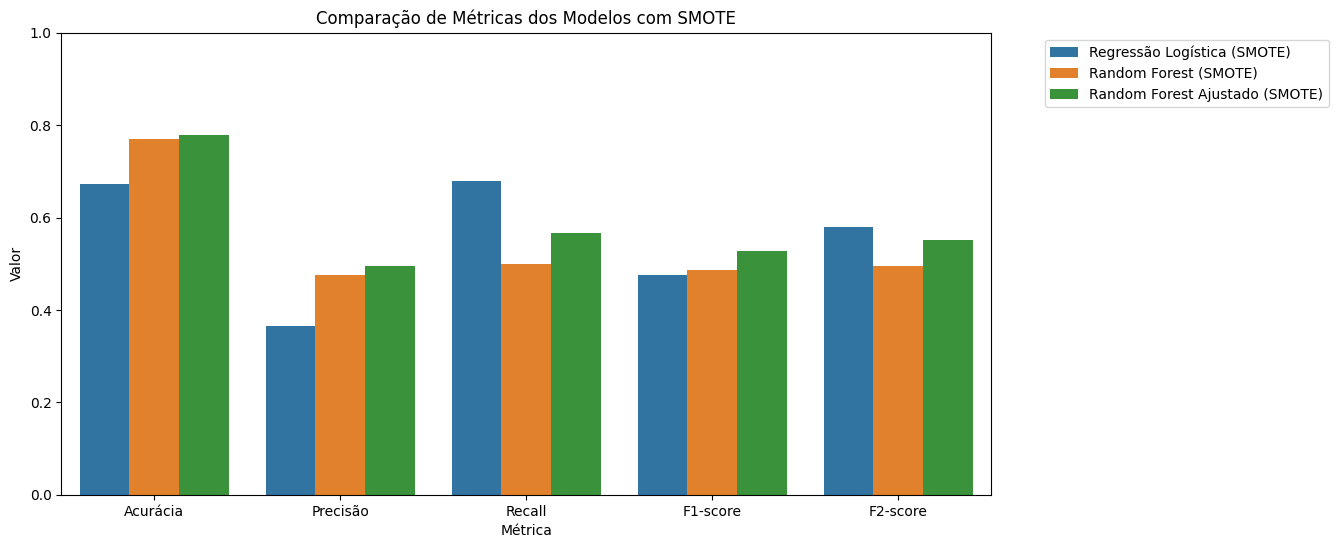

In [31]:
# Criar um dicionário para armazenar as métricas
metrics = {
    "Modelo": ["Regressão Logística (SMOTE)", "Random Forest (SMOTE)", "Random Forest Ajustado (SMOTE)"],
    "Acurácia": [
        accuracy_score(y_test, log_preds_smote),
        accuracy_score(y_test, rf_preds_smote),
        accuracy_score(y_test, rf_preds_smote_adjusted)
    ],
    "Precisão": [
        precision_score(y_test, log_preds_smote),
        precision_score(y_test, rf_preds_smote),
        precision_score(y_test, rf_preds_smote_adjusted)
    ],
    "Recall": [
        recall_score(y_test, log_preds_smote),
        recall_score(y_test, rf_preds_smote),
        recall_score(y_test, rf_preds_smote_adjusted)
    ],
    "F1-score": [
        f1_score(y_test, log_preds_smote),
        f1_score(y_test, rf_preds_smote),
        f1_score(y_test, rf_preds_smote_adjusted)
    ],
    "F2-score": [
        fbeta_score(y_test, log_preds_smote, beta=2),
        fbeta_score(y_test, rf_preds_smote, beta=2),
        fbeta_score(y_test, rf_preds_smote_adjusted, beta=2)
    ]
}

# Transformar em DataFrame
df_metrics = pd.DataFrame(metrics)

# Transformar para formato long (melhor para gráficos comparativos)
df_melt = df_metrics.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

# Plotar
plt.figure(figsize=(12,6))
sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt)
plt.title("Comparação de Métricas dos Modelos com SMOTE")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


A análise mostra que a Regressão Logística com SMOTE identifica mais inadimplentes, mas erra bastante ao classificar bons pagadores como maus. O Random Forest com SMOTE é mais equilibrado, mas deixa de capturar parte dos inadimplentes. Já o Random Forest Ajustado com SMOTE combina os pontos fortes: consegue identificar inadimplentes de forma consistente, sem aumentar tanto os erros do outro lado. Em outras palavras, esse modelo aprende padrões mais complexos do comportamento dos clientes e, por isso, oferece a melhor relação entre acertos e erros. Assim, considerando a necessidade de evitar tanto liberar crédito para inadimplentes quanto recusar bons clientes, o Random Forest Ajustado é a escolha mais adequada para o problema, respondendo à questão 3.

# Verificação de Overfitting




In [32]:
# Função para imprimir métricas
def print_metrics(y_true, y_pred, label):
    print(f"\n Métricas para {label}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")

# Previsões no conjunto de treino e teste
rf_train_preds = rf_model_smote_adjusted.predict(X_train_balanced)
rf_test_preds = rf_model_smote_adjusted.predict(X_test_selected)

# Avaliação direta
print("Random Forest Ajustado com SMOTE")
print_metrics(y_train_balanced, rf_train_preds, "Treino")
print_metrics(y_test, rf_test_preds, "Teste")

# Validação cruzada com F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)
cv_scores_rf = cross_val_score(rf_model_smote_adjusted, X_train_balanced, y_train_balanced, cv=5, scoring=f2_scorer)

print(f"\n F2-score médio na validação cruzada: {cv_scores_rf.mean():.4f}")
print(f"Desvio padrão: {cv_scores_rf.std():.4f}")

Random Forest Ajustado com SMOTE

 Métricas para Treino:
Accuracy:  0.7708
Precision: 0.8311
Recall:    0.6799
F1-score:  0.7479

 Métricas para Teste:
Accuracy:  0.7788
Precision: 0.4953
Recall:    0.5666
F1-score:  0.5286

 F2-score médio na validação cruzada: 0.6769
Desvio padrão: 0.0268


Foi realizada uma verificação final para avaliar a presença de overfitting. As métricas de desempenho no conjunto de treino e teste mostraram variações esperadas, mas não excessivas. O F1-score caiu de 0.74 no treino para 0.52 no teste, o que indica uma perda de desempenho fora do treino, porém dentro de um intervalo aceitável.
Além disso, a validação cruzada com F2-score apresentou média de 0.67 com baixo desvio padrão (0.0268), o que reforça a estabilidade do modelo em diferentes divisões dos dados. Com base nesses resultados, conclui-se que não há evidência significativa de overfitting no modelo final, e que ele apresenta boa capacidade de generalização para novos dados.

# Conclusão

Este MVP teve como objetivo prever a inadimplência de clientes de cartão de crédito com base em atributos financeiros e demográficos. Foram testados modelos de Regressão Logística e Random Forest, com e sem ajuste de hiperparâmetros e balanceamento de classes via SMOTE.

Os principais achados incluem:

- Forte correlação entre histórico de pagamento recente (especialmente PAY_0) e inadimplência.
- Pagamentos mensais (PAY_AMT1, PAY_AMT2, PAY_AMT6) são os atributos mais influentes na previsão.
- O modelo Random Forest ajustado com SMOTE apresentou o melhor desempenho na identificação de inadimplentes, com F2-score superior ao dos demais modelos, refletindo maior sensibilidade à classe minoritária.

A aplicação do SMOTE foi essencial para mitigar o viés causado pela desproporção entre classes, melhorando significativamente a capacidade dos modelos de identificar clientes com risco real de inadimplência.
